# TP2 :  Discrétisation de l'équation de Poisson

In [1]:
import numpy as np
import math

import scipy.sparse as sparse
import scipy.sparse.linalg

from scipy.integrate import quad

import matplotlib.pyplot as plt

### Equation de Poisson :
On se place dans le domaine $]0,1[$.
On souhaite discrétiser l'équation de Poisson avec des conditions aux limites de Dirichlet homogènes :
$$-u''(x) = f(x) \text{ dans } ]0,1[,$$
$$u(0) = u(1) = 0,$$
où $f$ est une fonction de $]0,1[$ donnée.

### Discrétisation du domaine :
On discrétise le domaine spatial $]X_{\text{min}},X_{\text{max}}[$ par $M>0$ sous-intervalles (dans la suite $X_{\text{min}}=0$ et $X_{\text{max}}=1$). 
Les points correspondant à cette discrétisation sont les $x_i = X_{\text{min}} + i h$ avec $h = \frac{X_{\text{max}} - X_{\text{min}}}{M}$ ($0 \leq i \leq M$). On pourra les calculer avec la commande suivante :

In [2]:
M=2
print(np.linspace(0,1,M+1))

[0.  0.5 1. ]


### Fonction second membre et solution exacte :

On étudie le problème précédent avec la fonction second membre
$$f(x) = x^2$$
Avec ce second membre, on peut prouver que la solution exacte est donnée par 
$$u(x) = \frac{x}{12}(1-x^3)$$

In [3]:
# fonction second membre
def f(x):
    return x**2


# sol exacte
def u_ex(x):
    return x*(1-x**3)/12


### Formulation variationnelle :
Le problème étudié peut s'écrire sous forme faible comme
$$ \text{Trouver } u \in H_0^1(0,1) \text{ tel que } \forall v \in H_0^1(0,1) , \; \int_0^1 u'(x) v'(x) dx = \int_0^1 f(x) v(x) dx $$

### Méthode des éléments finis :
On se propose de discrétiser ce problème avec la méthode des éléments finis.
On va donc approcher la fonction $u(x)$ par une fonction discrétisée $u_h(x)$ dans l'espace
$$V_{h0} = \{ v_h \in C^0([0,1]) \;|\; v_h \vert_{[x_{n-1} , x_n]} \in \mathbb{P}^1([x_{n-1} , x_n]) \; \forall n \in <1,M> \; | \; v_h(0) = v_h(1) = 0 \} ,$$
des fonctions continues nulles sur le bord et affines dans chaque sous-intervalle $[x_{n-1} , x_n]$.

Cette fonction $u_h$ est obtenue en remplaçant dans la formulation variationnelle l'espace continu $H_0^1(0,1)$ par l'espace discrétisé $V_{h0}$.
On résout donc le problème suivant:
$$\text{Trouver } u_h \in V_{h0} \text{ tel que } \forall v_h \in V_{h0}, \int_0^1 u_h'(x) v_h'(x) dx = \int_0^1 f(x) v_h(x) dx$$

### Fonctions de base :

L'espace $V_{h0}$ est un espace vectoriel dont la base canonique est $(\Phi_j)_{1 \leq j \leq M-1}$ où les fonctions $\Phi_j$ sont définies par
$$\Phi_j(x) = \left\{ \begin{array}{l} \dfrac{x - x_{j-1}}{h} \text{ si $x_{j-1} \leq x \leq x_j$,}
\\ \dfrac{x_{j+1}-x}{h} \text{ si $x_j \leq x \leq x_{j+1}$,} \\ 0 \text{ sinon.}\end{array}\right.$$
où $h = \frac1{M}$ est le pas de discrétisation.

In [4]:
# coder les fonctions de base
def Phi(M,j,x):
    h = 1./M
    # ...
    return ...

# quelques tests
print(Phi(4,1,0.25))
print(Phi(4,1,0.5))
print(Phi(4,1,0.75))
print(Phi(4,2,0.25))
print(Phi(4,2,0.5))
print(Phi(4,2,0.75))

Ellipsis
Ellipsis
Ellipsis
Ellipsis
Ellipsis
Ellipsis


### Ecriture algébrique :
On exprime $u_h \in V_{h0}$ dans la base $(\Phi_j)_{1 \leq j \leq M-1}$.
On a donc 
$$u_h (x) = \sum_{j=1}^{M-1} u_j \Phi_j (x) \quad \forall x \in [0,1]$$
où $u_j = u(x_j)$. On peut alors trouver les $u_j$ en résolvant le système linéaire
$$A U = F$$
où 
$$U = \begin{pmatrix} u_1 \\ u_2 \\ \vdots \\ u_{M-1} \end{pmatrix}, \qquad
F = \begin{pmatrix} \int_0^1 f(x) \Phi_1(x) dx \\ \int_0^1 f(x) \Phi_2(x) dx \\ \vdots \\ \int_0^1 f(x) \Phi_{M-1}(x) dx \end{pmatrix}
$$
et
$$
A = 
\begin{pmatrix} 
\int_0^1 \Phi_1'(x) \Phi_1'(x) dx & \cdots & \int_0^1 \Phi_1'(x) \Phi_{M-1}'(x) dx 
\\ 
\vdots &  & \vdots
\\
\int_0^1 \Phi_{M-1}'(x) \Phi_1'(x) dx & \cdots & \int_0^1 \Phi_{M-1}'(x) \Phi_{M-1}'(x) dx
\end{pmatrix}
= 
\dfrac1{h}
\begin{pmatrix}
2 & -1 & & (0)
\\
-1 & \ddots & \ddots
\\
   & \ddots & \ddots & -1
\\
(0)&& -1 & 2
\end{pmatrix}$$

In [5]:
# coder une fonction renvoyant la matrice A en fonction de M
def mat_A(M):
    h = 1/M
    
    row = list()
    col = list()
    data = list()
    
    # A_0,0
    row.append((0))
    col.append((0))
    #data.append(...)
    
    # A_0,1
    row.append((0))
    col.append((1))
    #data.append(...)
    
    #loop
    for i in range(1,M-2):
    
        # A_i,i = qque chose (exemple)
        # row.append((...))
        # col.append((...))
        # data.append( ... )  
    
        # A_i,i-1 = autre chose (exemple)
        # row.append((...))
        # col.append((...))
        # data.append( ... )
    
        # A_i,i+1 = encore autre chose
        # row.append((...))
        # col.append((...))
        # data.append( ... )

    # A_{M-2},{M-3}
    # row.append((...))
    # col.append((...))
    # data.append(...)
    
    # A_{M-2},{M-2}
    # row.append((...))
    # col.append((...))
    # data.append(...)
    
    row = np.array(row)
    col = np.array(col)
    data = np.array(data)      
    A = (sparse.coo_matrix((data, (row, col)), shape=(M-1, M-1))).tocsr()
    return ...



IndentationError: expected an indented block (<ipython-input-5-5915ae9cbe98>, line 47)

On se propose de coder une première approximation de la fonction second membre obtenue par
$$F_j = h f(x_{j+1}) \qquad 0 \leq j \leq M-1$$

On pourra dans un second temps (une fois que tout le TP a été fini) coder la fonction exacte donnant
$$F_j = \int_0^1 f(x) \Phi_{j+1}(x) dx \qquad 0 \leq j \leq M-1$$

In [6]:
# premiere approximation :
def RHS_DF(M,f):
    F = np.zeros(M-1)
    h = 1./M
    # ...
    return F

def unite(x):
    return x
# pour la deuxieme fonction (a faire une fois que tout le TP est fini)
# on pourra utiliser la methode d'integration suivante qui calcule l'integrale de unite(x) entre 0 et 1 :
integrale = quad(unite,0,1)[0]
print(integrale)

# valeur exacte de F
def RHS_F(M,f):
    F = np.zeros(M-1)
    h = 1./M
    # ...
    return F




0.5


Coder une fonction retournant la solution éléments finis aux points $(x_j)_{0 \leq j \leq M}$. On pourra tester successivement les deux fonctions second membre.

In [7]:
# fonction calculant la solution elements finis
def EF_DH(M,f):
    # ...
    return U


Représenter $u_h$ graphiquement et la comparer avec la solution exacte.

In [8]:
# fonction representant u_h graphiquement
# et la comparant avec la solution exacte
def graph_sol(M,f,u_ex):
    X = np.linspace(0,1,M+1)
    sol_ex = np.zeros(M+1)
    for i in range(0,M+1):
        sol_ex[i] = u_ex(X[i])
    
    sol_EF = EF_DH(M,f)
    
    plt.plot(X,sol_ex)
    plt.plot(X,sol_EF)
    plt.show()

graph_sol(10,f,u_ex)



NameError: name 'U' is not defined

### Calcul des normes
On définit la semi-norme $H^1$ de $v_h \in V_{h0}$ comme
$$\| v_h' \|_{L^2} = \sqrt{\int_0^1 (v_h'(x))^2 dx} = \sqrt{\sum_{j=1}^M h\left(\dfrac{v_h(x_{j}) - v_h(x_{j-1})}{h} \right)^2}$$
Coder une fonction calculant cette quantité à partir des coefficients $V$ de $v_h$.

In [9]:
def norme_H1(M,V):
    h = 1./M
    somme = 0
    # ...
    return ...



De la même façon, coder une fonction qui renvoie la norme $L^2$ donnée par
$$\| v_h \|_{L^2} = \sqrt{\int_0^1 (v_h(x))^2 dx} = \sqrt{\dfrac{h}3 \sum_{j=1}^M (v_h(x_{j-1}))^2 + v_h(x_{j-1}) v_h(x_{j}) + (v_h(x_{j}))^2 }$$

In [10]:
def norme_L2(M,V):
    h = 1./M
    somme = 0
    # ...
    return ...


### Etude de convergence
Pour différentes valeurs de $M$, calculer l'erreur commise par le schéma en semi-norme $H^1$, c'est-à-dire $\| u_h' - I_h' \|_{L^2}$ où $u_h$ est la solution obtenue par la méthode des éléments finis et $I_h \in V_{h0}$ est l'interpolateur de Lagrange défini par $I_h(x_j) = u(x_j)$ ($1 \leq j \leq M-1$). Tracer l'erreur en fonction de $M$ en échelle log-log. Tracer également l'erreur en norme $L^2$. Commenter l'ordre de convergence obtenu.

ValueError: x and y must have same first dimension, but have shapes (7,) and (0,)

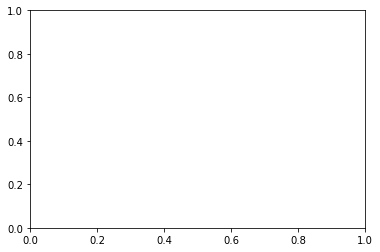

In [11]:
liste_M = [10,20,40,80,160,320,640]
liste_err_H1 = []
liste_err_L2 = []

# ...

plt.plot(liste_M, liste_err_H1)
plt.plot(liste_M, liste_err_L2)
plt.loglog()